In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("avocado.csv")

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.isnull().any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [9]:
df.sort_values('Date',inplace=True)

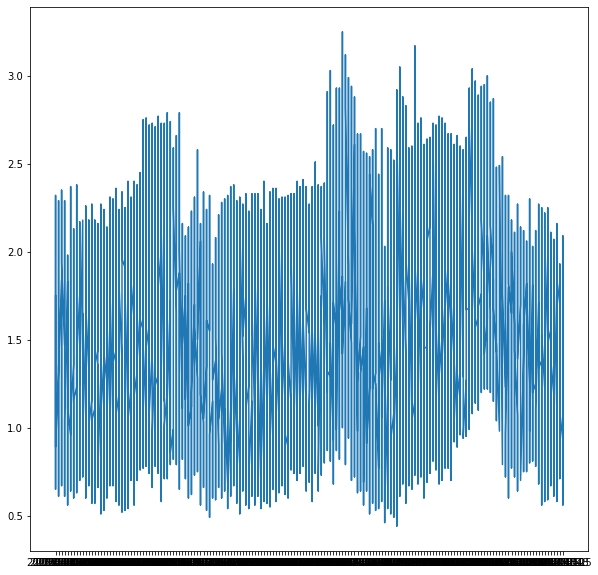

In [12]:
plt.figure(figsize=(10,10))
ax=plt.subplot()
ax.plot(df["Date"],df["AveragePrice"])

In [15]:
sns.distplot(df["AveragePrice"])

TypeError: ignored

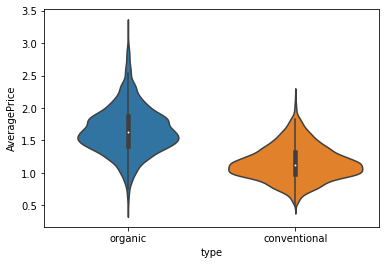

In [18]:
sns.violinplot(y="AveragePrice",x="type",data=df)

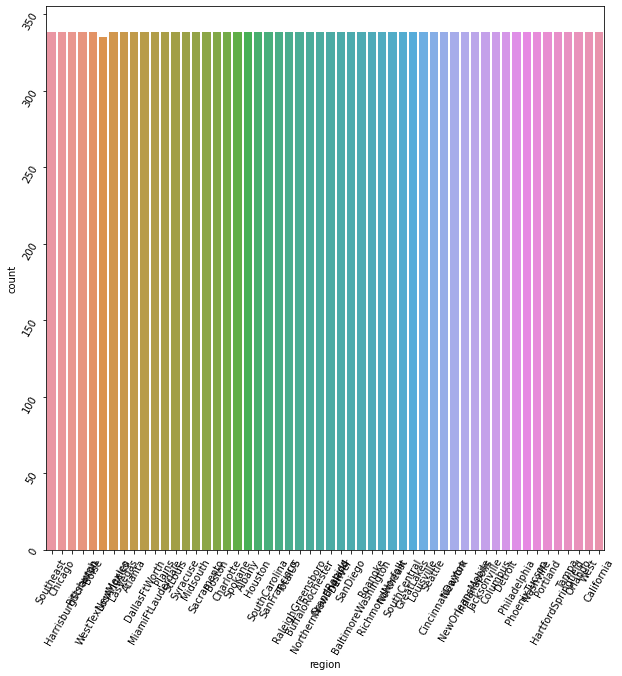

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='region',data=df)
plt.tick_params(rotation=60)

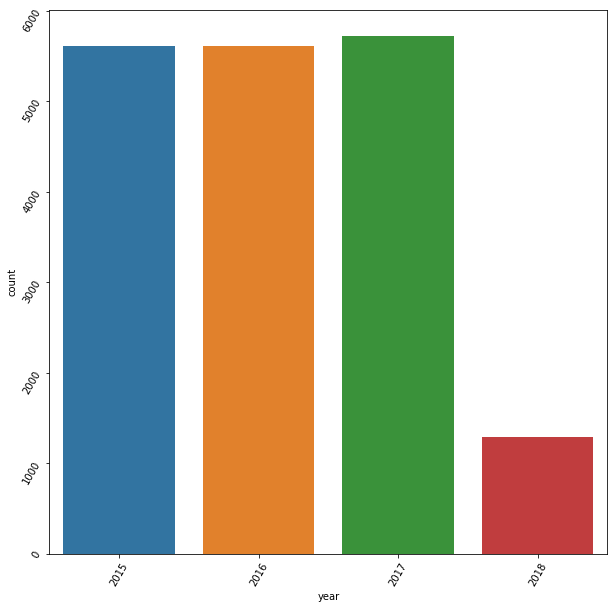

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(x='year',data=df)
plt.tick_params(rotation=60)

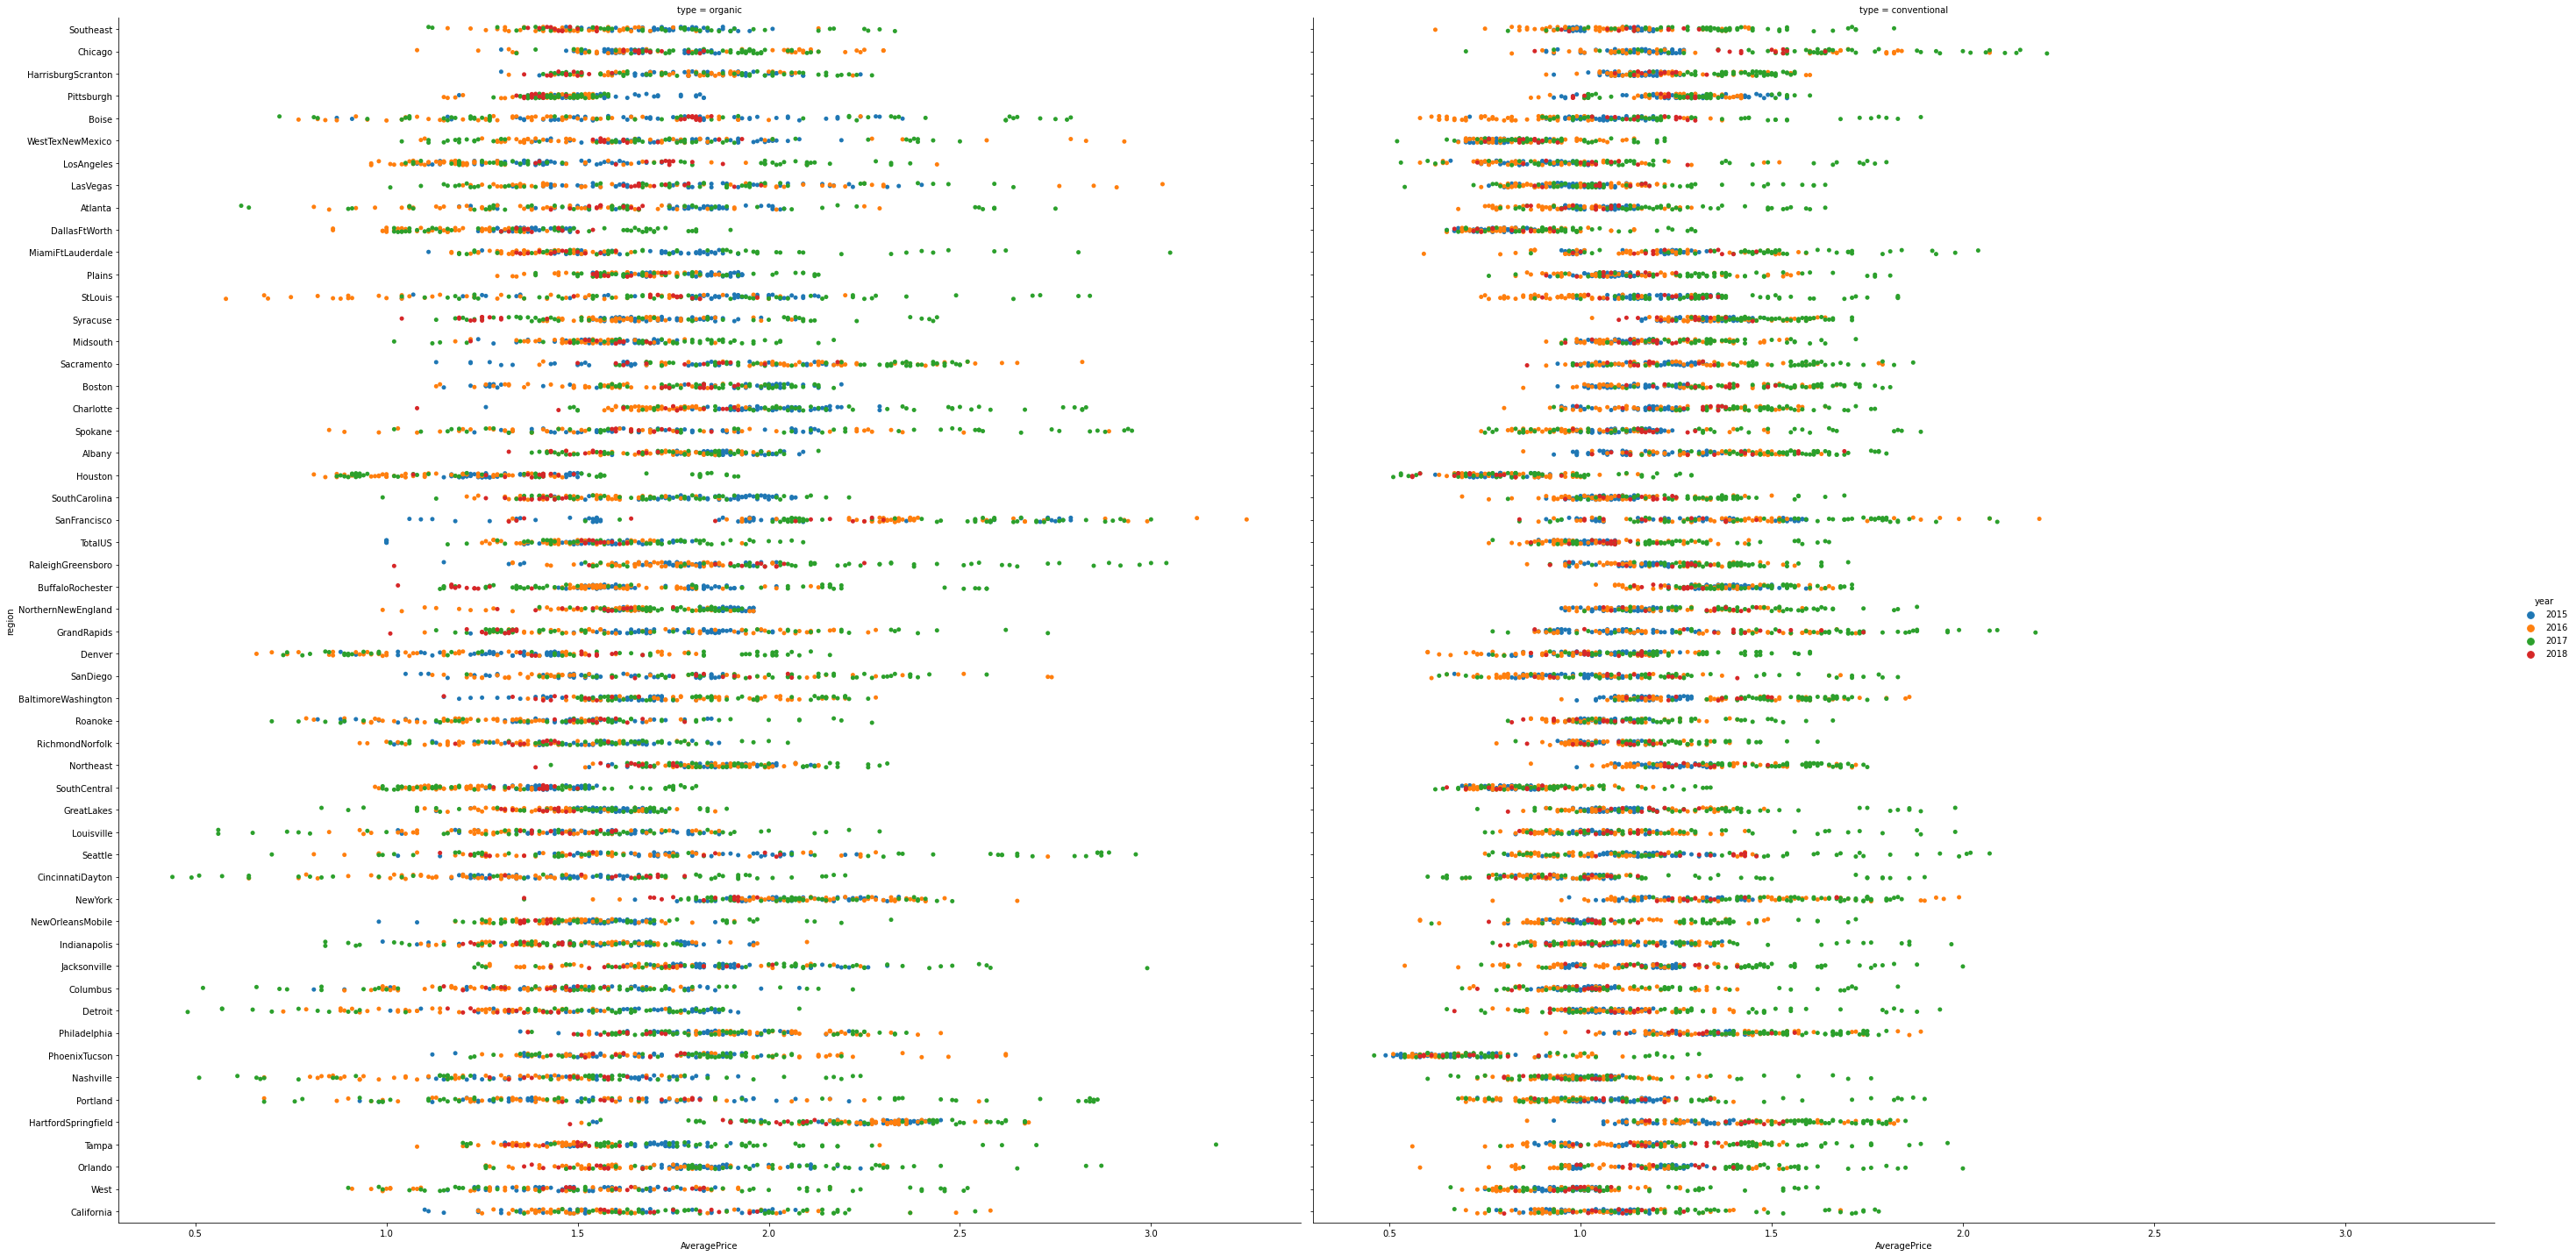

In [30]:
sns.catplot('AveragePrice','region',data=df,hue='year',height=20,col='type')

In [31]:
df_prophet=df.loc[:,["Date","AveragePrice"]]

In [32]:
df_prophet.rename(columns={"Date":"ds","AveragePrice":"y"},inplace=True)

In [34]:
df_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [35]:
model=Prophet()
model.fit(df_prophet)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


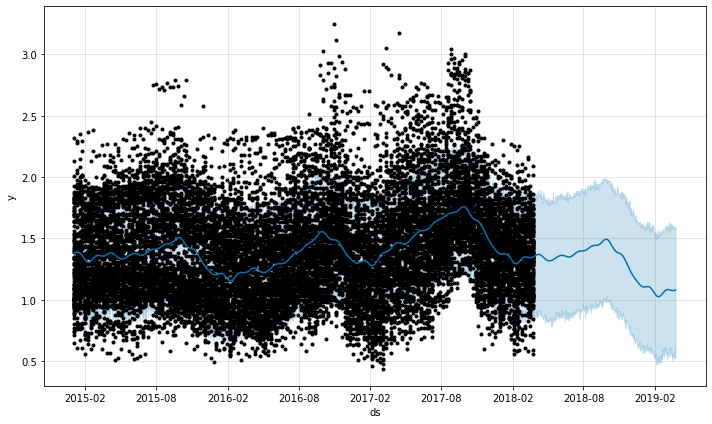

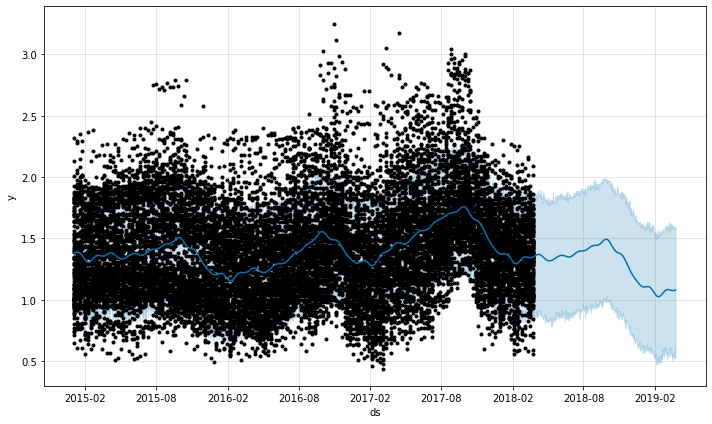

In [44]:
future=model.make_future_dataframe(periods=365)
forecast=model.predict(future)
model.plot(forecast)

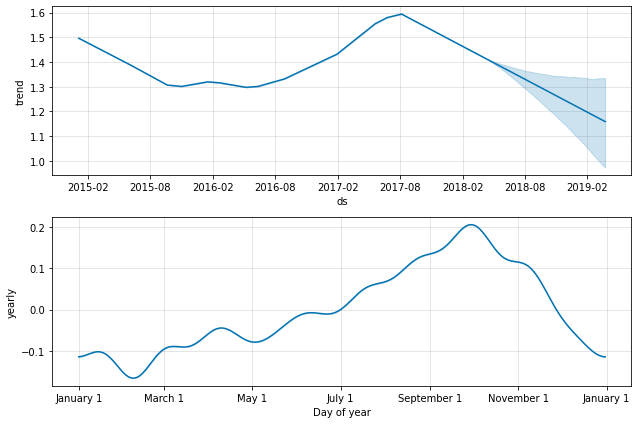

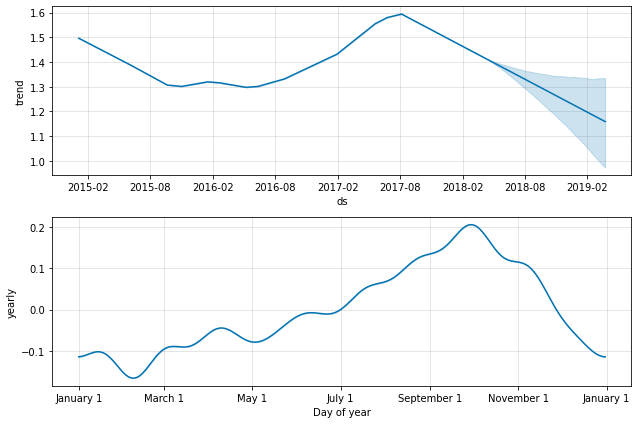

In [45]:
model.plot_components(forecast)

# Region Specific

In [46]:
  d_west=df[df["region"]=="West"]

In [48]:
d_west_prophet=d_west.loc[:,["Date","AveragePrice"]]

In [49]:
d_west_prophet.rename(columns={"Date":"ds","AveragePrice":"y"},inplace=True)

In [52]:
model2=Prophet()
model2.fit(d_west_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


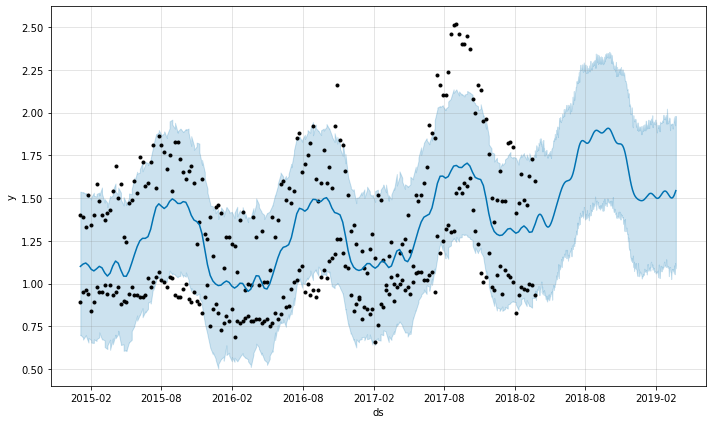

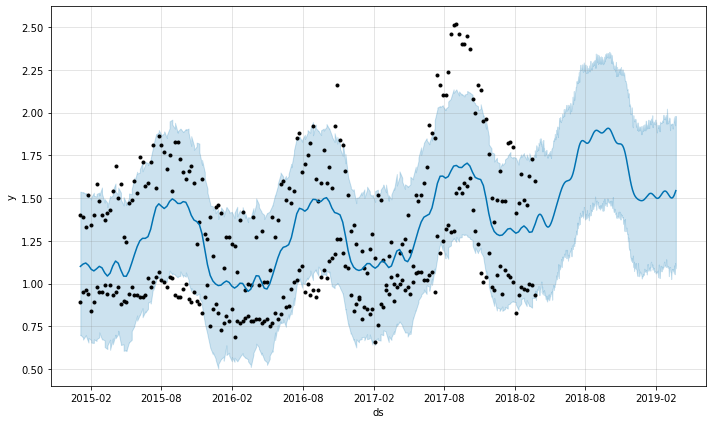

In [53]:
future=model2.make_future_dataframe(periods=365)
forecast=model2.predict(future)
model2.plot(forecast)

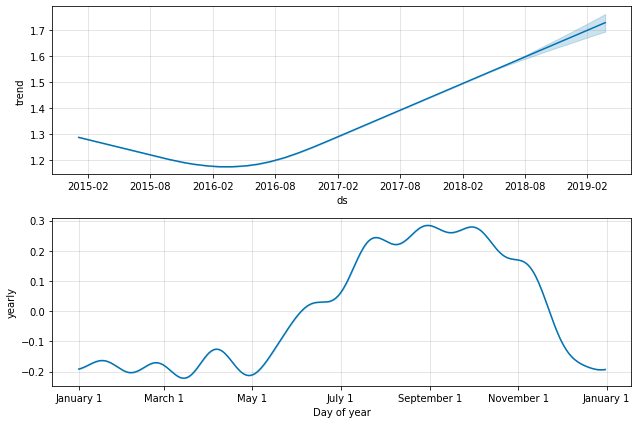

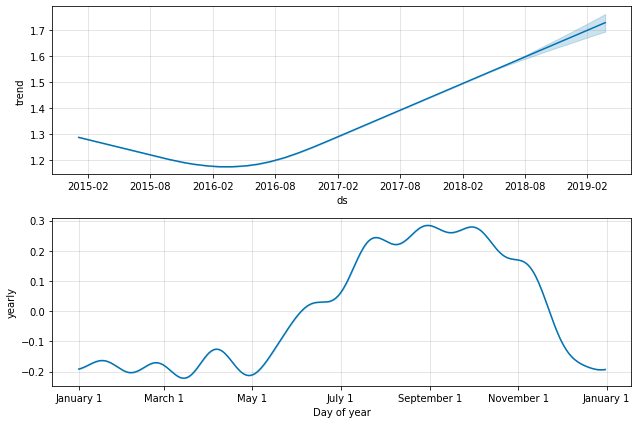

In [54]:
model2.plot_components(forecast)